The Bank Marketing Dataset contains data from a marketing campaign. The goal of the campaign was to encourage clients to subscribe to a term deposit, a long-term savings account.

# Variables
The dataset contains 11,162 instances and 17 features (attributes), covering both categorical and numeric data.

## Numeric
1. age: Age of the client
2. balance: The average yearly balance
3. day: Last contact day of the month
4. duration: Duration of the last contact
5. campaign: Number of contacts performed during this campaign
6. pdays: Number of days since the client was last contacted (-1 means not contacted previously)
7. previous: Number of contacts performed before this campaign

## Categorical
8. job: Type of job
9. marital: Marital status
10. education: Level of education
11. default: Whether the client has credit in default
12. housing: Whether the client has a housing loan
13. loan: Whether the client has a personal loan
14. contact: Communication type
15. month: Last contact month
16. poutcome: Outcome of the previous campaign

## Target Variable
deposit: Target variable indicating whether the client subscribed to a term deposit

# Exploratory Data Analysis (EDA)

In [18]:
!pip install pandas matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('bank.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
    print(df.head())
except Exception as e:
    print("Error reading the CSV file:", e)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 110.9 MB/s eta 0:00:0000:01
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4   

## Numeric Variables

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Summary:
* Age: The average age of clients is around 41, with a wide range (18 to 95 years old). Age could be a key factor, especially since older clients might be more inclined to invest in long-term deposits.
* Balance: The average balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
* Duration: The duration of the last contact ranges significantly from 2 to 3,881. This feature is a strong predictor of the target, as longer conversations usually indicate higher interest.
* The other variables are more difficult to make use of with these numbers alone.

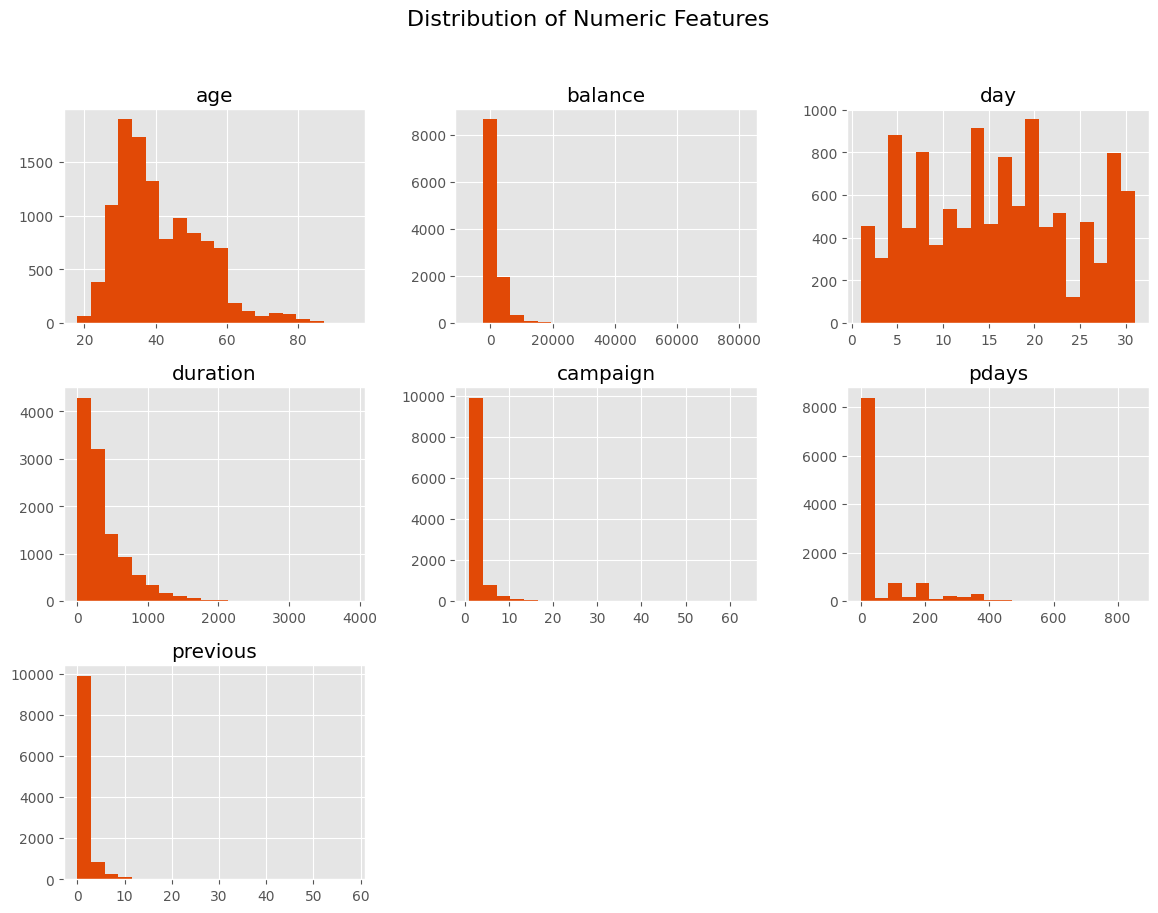

In [11]:
plt.style.use('ggplot')

# Plotting histograms for numeric features
df.hist(bins=20, figsize=(14, 10), color='#E14906')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()


Summary
* age: We can see that we have got a good spread for age of people in the sample but not many people under 20 (for obvious reasons) and also not many people over 60.
* duration: We have got an exponential decay curve.
* balance: We can see that around 80% of the sample have a low balance and most of the rest only a slightly larger balance so not many wealthy people are in the sample.
* day: We have got a good variety of final contact day in the month but not sure how relevant this data is in terms of predicting deposit result.
* The rest of the variables do not have a good spread of data.

## Categorical Variables

/tmp/ipykernel_241/1441692981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_241/1441692981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_241/1441692981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_241/1441692981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `

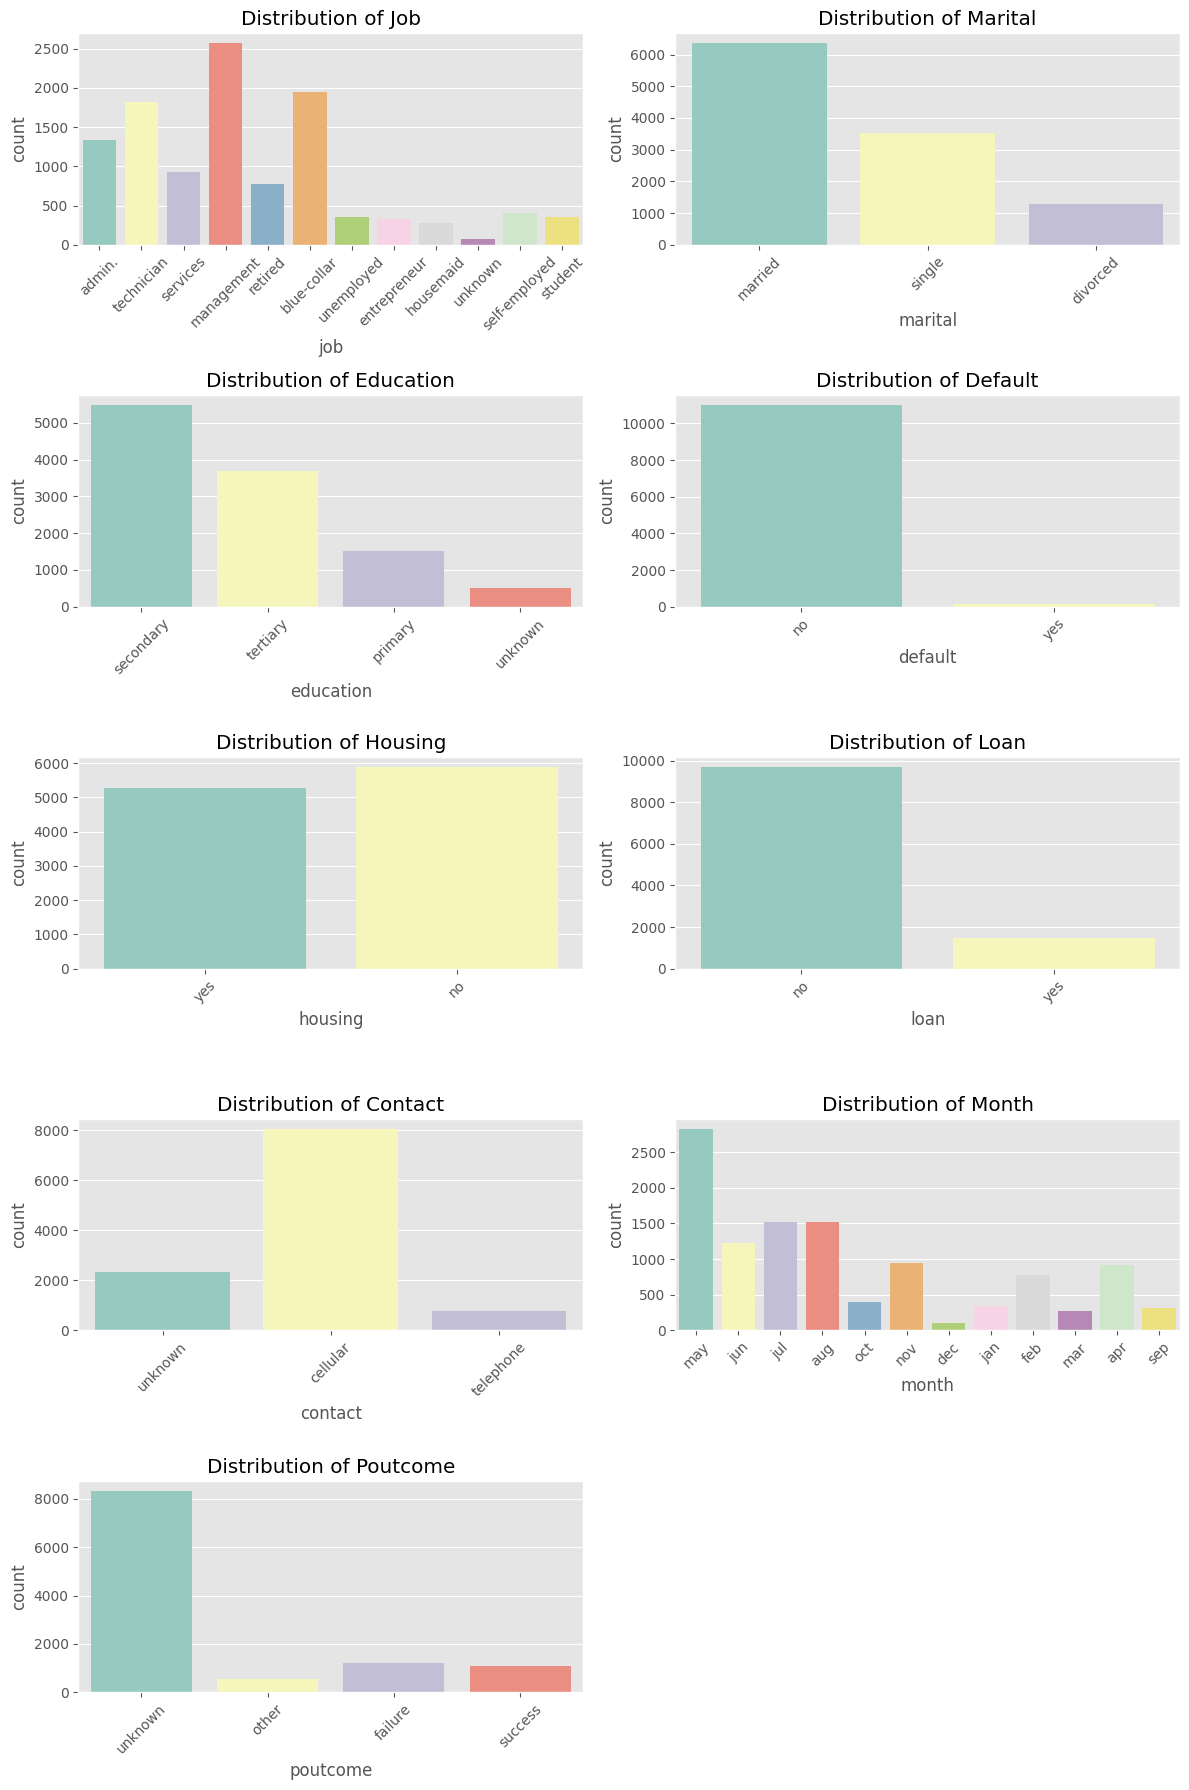

In [14]:
# Let's create distribution plots for all the categorical variables in the dataset

# Setting up the categorical variables from the dataset
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create subplots for each categorical feature
plt.figure(figsize=(12, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns of subplots
    sns.countplot(x=feature, data=df, palette='Set3')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Summary:
* Most of the categorical variables have a decent spread.
* Default: Almost all the people in the sample have said no.
* Poutcome: May not be a very useful variable as most of the count is unknown

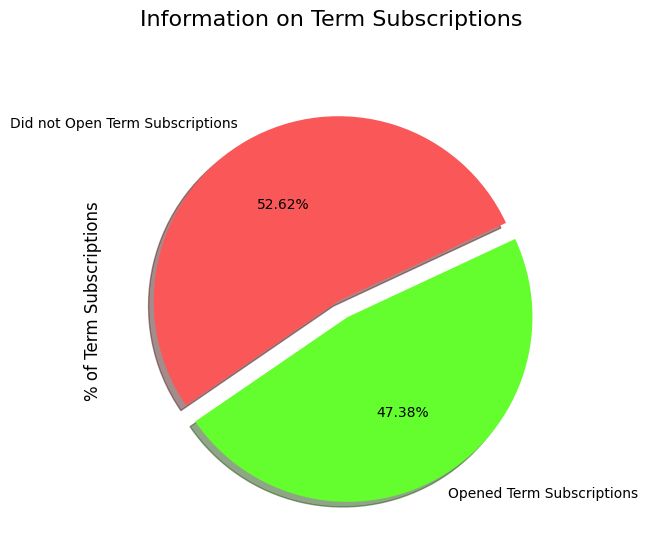

In [7]:
# Set up the figure and axis
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Define colors and labels
colors = ["#FA5858", "#64FE2E"]
labels = ["Did not Open Term Subscriptions", "Opened Term Subscriptions"]

# Title of the pie chart
plt.suptitle('Information on Term Subscriptions', fontsize=16)

# Plotting the pie chart
df["deposit"].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%1.2f%%', 
    ax=ax, 
    shadow=True, 
    colors=colors, 
    labels=labels, 
    fontsize=10, 
    startangle=25
)

# Set the ylabel for the pie chart
ax.set_ylabel('% of Term Subscriptions', fontsize=12)

# Display the plot
plt.show()

The distribution of the target variable deposit (yes/no) is nearly balanced, with about 52.6% "no" and 47.4% "yes". This is beneficial for binary classification problems as models won't be biased toward one class.

## Correlations

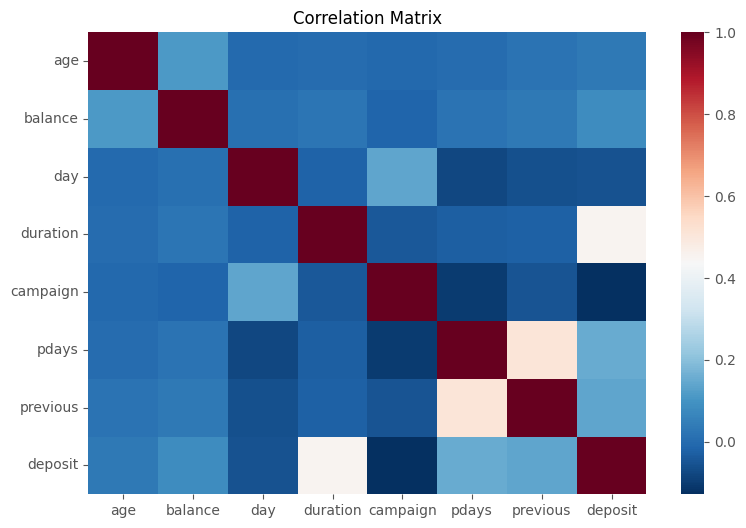

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(9,6))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=12)
plt.show()

Summary:
* Most of the numeric variables + deposit have fairly low correlations with each other.
* previous and pdays have a relatively high correlation so it is redundant to include both variables in a classification problem.
* duration is highly correlated with the response variable deposit so including this in a classification model will likely skew the results.

Correlations between Numeric and Categorical Variables:
* Balance, Job, Education, and Age are key drivers of financial behavior. Higher-income individuals with stable jobs and higher education are more likely to have high balances, fewer loan defaults, and a higher propensity to invest in products like term deposits.
* Loan and Default are negatively correlated with financial stability, leading to lower balances and lower likelihoods of subscribing to deposits.
* Marital Status, Housing Loan, and Personal Loan may reflect financial responsibilities that affect investment behaviors.

# Conclusion
This dataset is suitable for a binary classification problem. It offers a well-balanced target variable, diverse features, and enough complexity to experiment with various classification models.
However some of the variables are either too strongly correlated with the target variable or strongly correlated with another variable. These variables should be removed before classification in order to avoid skewed results or to prevent redundancy.

# References
Janiobachmann (2019) Bank marketing campaign || opening a term deposit, Kaggle. Available at: https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit (Accessed: 30 September 2024). 